In [21]:
# open a fasta file as string
from Bio import SeqIO
from matplotlib.pyplot import imshow
import numpy as np
import cv2  # python-opencv
import random

class option:
    imageSize = 1000 # output image size, 30000 for big sequence 
    gainxy = 0.2     # zoom the sequence, this parameter is in development phase
    seqColor =[(255,0,0,255),(0,255,0,255),(0,0,255,255),(128,128,128,255)]  #color for 'A' , 'C','T', 'G'
    maxNuclDistancePx = 5 #Advance parameter: max distance of two nucletide in graph 

fastaFileName = "sequence.fasta" #input file name
recordIdName = '*'


In [22]:
for record in SeqIO.parse(fastaFileName, "fasta"):
    if(record.id == recordIdName):
        print(record.id)
        break
    else:
        print( "Select this record {} ".format(record.id))
        break
#record.seq

Select this record NC_003076.8:c5411766-5406863 


x min max y min max 0 , 1000 , 0 , 1000
end of Generating image


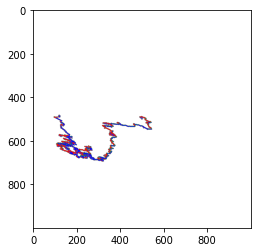

In [23]:
#generate image footprint for seq and save as test.png file

def generateFootprint(seq, option):
    
    initImageSize = option.imageSize
    seqColor = option.seqColor
    incVal = option.maxNuclDistancePx
    gain = option.gainxy
    incVal = int(gain * incVal)
        
    max_x = initImageSize
    min_x = 0
    
    max_y = initImageSize
    min_y = 0

    width, height = initImageSize, initImageSize
    x1, y1 = int(initImageSize/2), int(initImageSize/2)
    image = np.zeros((height, width, 4), np.uint8)
    
    state = 'a' #satte for many same nucletide in series TODO now deleted after 5000 sample
    stCount = 0
    
    for c in seq:

        if(c == 'a' or c == 'A'):
            inVal = 0
            if(state == 'a'):
                stCount= stCount + 1
            else:
                stCount = 0
            if(stCount == 100):
                print("stCount a reach 5000")
                continue 
        elif(c == 'c' or c == 'C'):
            inVal = 1
            if(state == 'c'):
                stCount= stCount + 1
            else:
                stCount = 0
            if(stCount == 100):
                print("stCount c reach 5000")
                continue
        elif(c == 't' or c == 'T'):
            inVal = 2
            if(state == 't'):
                stCount= stCount + 1
            else:
                stCount = 0
            if(stCount == 100):
                print("stCount t reach 5000")
                continue
                
        elif(c == 'g' or c == 'G'):
            inVal = 3
            if(state == 'g'):
                stCount = stCount + 1
            else:
                stCount = 0
            if(stCount == 100):
                print("stCount g reach 5000")
                continue
        else:
            #print('error char is ',c)
            continue

        #print(inVal)
        if(inVal == 0):
            x2, y2 = x1+int(incVal*2), y1 + incVal
        elif(inVal == 1):
            x2, y2 = x1-incVal, y1+incVal 
        elif(inVal == 2):
            x2, y2 = x1-int(incVal*2), y1 - incVal
        elif(inVal == 3):
            x2, y2 = x1+incVal, y1-incVal 

            
        dontplot = 0
    
        if(max_x < x2):
            max_x = x2
            x2 = 0+50
            #dontplot = 1
        
        if(max_y < y2):
            max_y = y2
            y2 = 0+50
            #dontplot = 1
            
        if(min_x > x2):
            min_x = x2
            x2 = max_x-50
            #dontplot = 1
            
        if(min_y > y2):
            min_y = y2
            y2 = max_y-50
            #dontplot = 1
            
            
        line_thickness = 3
        
        if(np.abs(x2-x1)<100 and np.abs(y2-y1)<100):
            image = cv2.line(image, (x1, y1), (x2, y2), color = seqColor[inVal], thickness=line_thickness)
        x1, y1 = x2, y2
    
    print("x min max y min max",min_x,',', max_x,',',min_y,',',max_y)
    return image
    #imshow(image)

image = generateFootprint(record.seq, option)
cv2.imwrite("./result/" + "test.png",image)
print("end of Generating image")

imshow(image)

In [24]:
# simple mutation and save the footprint 
# swhouldbe update with real mution code

def replacMutate(f):
    datReplace = ['a','c','g', 't']
    list_f = list(f)
    
    #100 change in nucletide
    for i in range(int(len(f)/50)):
        rndPos = random.randint(0, len(f)-1)
        list_f[rndPos] = datReplace[random.randint(0,3)]
    list_f = ''.join(list_f)
    
    for i in range(int(len(f)/1000)): #one replace
        splitat = random.randint(0, len(f)-1)
        left, right = list_f[:splitat], list_f[splitat:]
        list_f = left + datReplace[random.randint(0,3)] +right
    
    for i in range(int(len(f)/1000)): #two replace
        splitat = random.randint(0, len(f)-1)
        left, right = list_f[:splitat], list_f[splitat:]
        list_f = left + datReplace[random.randint(0,3)] + datReplace[random.randint(0,3)] +right
    
    return list_f

for i in range(10):
    seq = replacMutate(record.seq)
    image = generateFootprint(seq, option)
    cv2.imwrite("./result/" + str(i)+"test.png",image)

x min max y min max 0 , 1000 , 0 , 1000
x min max y min max 0 , 1000 , 0 , 1000
x min max y min max 0 , 1000 , 0 , 1000
x min max y min max 0 , 1000 , 0 , 1000
x min max y min max 0 , 1000 , 0 , 1000
x min max y min max 0 , 1000 , 0 , 1000
x min max y min max 0 , 1000 , 0 , 1000
x min max y min max 0 , 1000 , 0 , 1000
x min max y min max 0 , 1000 , 0 , 1000
x min max y min max 0 , 1000 , 0 , 1000
